In [7]:
from pickle import load
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline
    
# extract features from each photo in the directory
def extract_features(filename):
    # load the model
    model = VGG16()
    # re-structure the model
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    # load the photo
    image = load_img(filename, target_size=(224, 224))
    # convert the image pixels to a numpy array
    plt.imshow(image)
    
    
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get features
    feature = model.predict(image, verbose=0)
    return feature
 
# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None
 
# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for i in range(max_length):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer
        yhat = argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text

In [11]:
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))

# load the model
model_a = load_model('model-ep003-loss3.690-val_loss3.854.h5')
model_b = load_model('model-ep004-loss3.598-val_loss3.844.h5')
model_c = load_model('model-ep002-loss3.880-val_loss3.895.h5')

model a: startseq man in red shirt is standing on the grass endseq
model_b: startseq two children are playing in the grass endseq
model_c: startseq two children are playing with the grass endseq


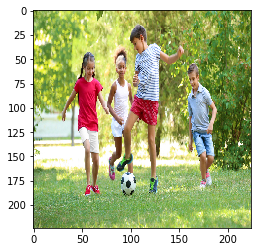

In [18]:
# pre-define the max sequence length (from training)
max_length = 34
# load and prepare the photograph
photo = extract_features('ex2.jpg')
# generate description
description_a = generate_desc(model_a, tokenizer, photo, max_length)
print("model a:", description_a)
description_b = generate_desc(model_b, tokenizer, photo, max_length)
print("model_b:", description_b)
description_c = generate_desc(model_c, tokenizer, photo, max_length)
print("model_c:", description_c)

model a: startseq man is riding snowy mountain endseq
model_b: startseq man in red shirt is riding his bike on the beach endseq
model_c: startseq man in red shirt is jumping into the water endseq


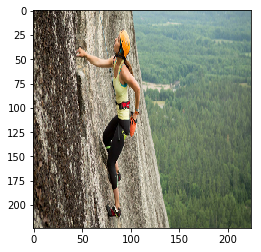

In [19]:
photo = extract_features('ex1.jpg')
# generate description
description_a = generate_desc(model_a, tokenizer, photo, max_length)
print("model a:", description_a)
description_b = generate_desc(model_b, tokenizer, photo, max_length)
print("model_b:", description_b)
description_c = generate_desc(model_c, tokenizer, photo, max_length)
print("model_c:", description_c)

model a: startseq man in red shirt is riding bike on the street endseq
model_b: startseq man in red shirt is standing on the street endseq
model_c: startseq man in red shirt is jumping over the track endseq


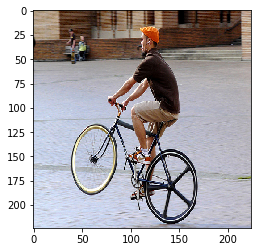

In [21]:
photo = extract_features('ex3.jpg')
# generate description
description_a = generate_desc(model_a, tokenizer, photo, max_length)
print("model a:", description_a)
description_b = generate_desc(model_b, tokenizer, photo, max_length)
print("model_b:", description_b)
description_c = generate_desc(model_c, tokenizer, photo, max_length)
print("model_c:", description_c)